### Setup and Load Data ###

In [1]:
run ../initialize.ipynb

Lax Version : 1.5.2


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
mpl.rcParams['axes.linewidth'] = 2.5
R_tpc=pax_config['DEFAULT']['tpc_radius']

In [3]:
def get_file_list(path, pattern, remove_string='', remove_path=True):
    '''
    Get a list of files matching pattern in path. Optional to remove a part of the path (i.e. the extention)
    Optional to remove the path
    '''
    file_list = glob.glob(path + pattern)
    # Remove path
    for i, f in enumerate(file_list):
        if remove_path:
            f = f.replace(path, '')
        if remove_string != '':
            f = f.replace(remove_string, '')
        file_list[i] = f
    file_list = np.sort(file_list)
    return file_list


### Extract Hist from pre-processed pickles: SR0

In [17]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun0'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']

Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 1390 rows removed (4.86% passed)
Source in place selection: 559 rows removed (61.74% passed)
Source in place selection: 1372 rows removed (6.09% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [18]:
%%time
print('Searching for Processed Pickle Files')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))

processed_list=[]
for dataset in tqdm(datasets):
    with open(simpath+dataset, 'rb') as handle:
        data_temp = pickle.load(handle)
        try:
            version = data_temp['version']
            if version =='2.0':
                processed_list.append(dataset)
        except KeyError:
            continue
print("Found %i processed files " %len(processed_list))
datasets=processed_list


dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_rn.loc[datasets_rn.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_kr.loc[datasets_kr.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_bkg.loc[datasets_bkg.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

Searching for Processed Pickle Files


  0%|          | 0/5707 [00:00<?, ?it/s]

Found 5707 datasets


  0%|          | 1/5702 [00:00<17:42,  5.37it/s]

Found 5702 processed files 


100%|██████████| 5702/5702 [02:44<00:00, 34.57it/s]

CPU times: user 1min 17s, sys: 1min 34s, total: 2min 52s
Wall time: 16min 57s


In [19]:
dict_source_sr0={'Radon' : dicts_datasets_rn, 'Background' : dicts_datasets_bkg, 'Krypton': dicts_datasets_kr,}
for source, dict_data in dict_source_sr0.items():
    print(source, len(dict_data))

Krypton 89
Background 901
Radon 71


### Extract Hist from pre-processed pickles: SR1

In [22]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']


Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 7229 rows removed (4.56% passed)
Source in place selection: 1185 rows removed (84.35% passed)
Source in place selection: 7119 rows removed (6.01% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [23]:
%%time
print('Searching for Processed Pickle Files')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))

processed_list=[]
for dataset in tqdm(datasets):
    with open(simpath+dataset, 'rb') as handle:
        data_temp = pickle.load(handle)
        try:
            data_temp['version']
            processed_list.append(dataset)
        except KeyError:
            continue
print("Found %i processed files " %len(processed_list))
datasets=processed_list

dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_rn.loc[datasets_rn.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_kr.loc[datasets_kr.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dataset_temp = datasets_bkg.loc[datasets_bkg.name==dataset[:-7]]
            time_diff=dataset_temp.end-dataset_temp.start
            data_dict['duration'] =  time_diff.iloc[0].seconds
            data_dict['trigger_rate']=dataset_temp.iloc[0].trigger__events_built
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

  0%|          | 0/5707 [00:00<?, ?it/s]

Searching for Processed Pickle Files
Found 5707 datasets


  1%|          | 49/5707 [00:00<00:11, 486.26it/s]

Found 5707 processed files 


100%|██████████| 5707/5707 [05:26<00:00, 17.49it/s] 

CPU times: user 1min 43s, sys: 1min 25s, total: 3min 8s
Wall time: 16min 37s


In [24]:
dict_source_sr1={'Krypton': dicts_datasets_kr,
                 'Radon' : dicts_datasets_rn,
                 'Background' : dicts_datasets_bkg
                }
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))

Krypton 297
Background 2059
Radon 200


### Time Distribution

In [43]:
# Plots average lifetime over a run, versus run number

#plt.figure(figsize=(10, 8))
source_key={'Radon': 'Rn220', 'Krypton': 'Kr83m', 'Background': 'none'}
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
source_dfs_sr0={}
source_dfs_sr1={}

for source, dict_data in dict_source_sr0.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    event_rate_array=[]
    livetime_array=[]
    trigger_rate_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events_hist=data['deltat']
        events=data['events']
        duration=data['duration']
        trigger_rate=data['trigger_rate']

        livet_hist=livet_hist.sum('s2_area')
        livet_hist=livet_hist/events
        
        events_hist=events_hist.sum('s2_area')
        events_hist=events_hist/events
        
        event_rate_array.append(events/duration)
        trigger_rate_array.append(trigger_rate/duration)
        average_array.append(np.average(events_hist[100:]))
        livetime_array.append(np.average(livet_hist[100:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    #source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array, 'event_rate': event_rate_array, 
                         'trigger_rate': trigger_rate_array, 'livetime': livetime_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
    
    source_dfs_sr0[source]=test_df

livet_hist=0
events=0   
for source, dict_data in dict_source_sr1.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    event_rate_array=[]
    livetime_array=[]
    trigger_rate_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events_hist=data['deltat']
        events=data['events']
        duration=data['duration']
        trigger_rate=data['trigger_rate']

        livet_hist=livet_hist.sum('s2_area')
        livet_hist=livet_hist/events
        
        events_hist=events_hist.sum('s2_area')
        events_hist=events_hist/events
        
        event_rate_array.append(events/duration)
        trigger_rate_array.append(trigger_rate/duration)
        average_array.append(np.average(events_hist[100:]))
        livetime_array.append(np.average(livet_hist[100:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    #source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array, 'event_rate': event_rate_array, 
                         'trigger_rate': trigger_rate_array, 'livetime': livetime_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
                   
    source_dfs_sr1[source]=test_df

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
  0%|          | 0/901 [00:00<?, ?it/s]

Krypton
Source in place selection: 19791 rows removed (7.37% passed)
Background
Source in place selection: 7082 rows removed (66.85% passed)


  0%|          | 0/2059 [00:00<?, ?it/s]

Radon
Source in place selection: 19803 rows removed (7.31% passed)
Krypton
Source in place selection: 19791 rows removed (7.37% passed)
Background
Source in place selection: 7082 rows removed (66.85% passed)


100%|██████████| 200/200 [00:00<00:00, 2438.44it/s]

Radon
Source in place selection: 19803 rows removed (7.31% passed)


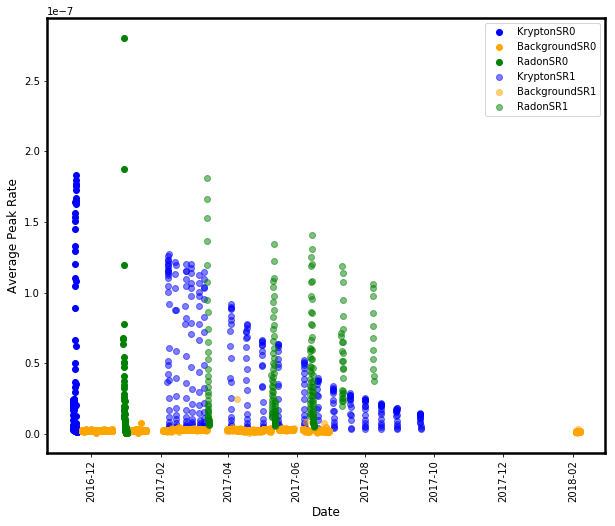

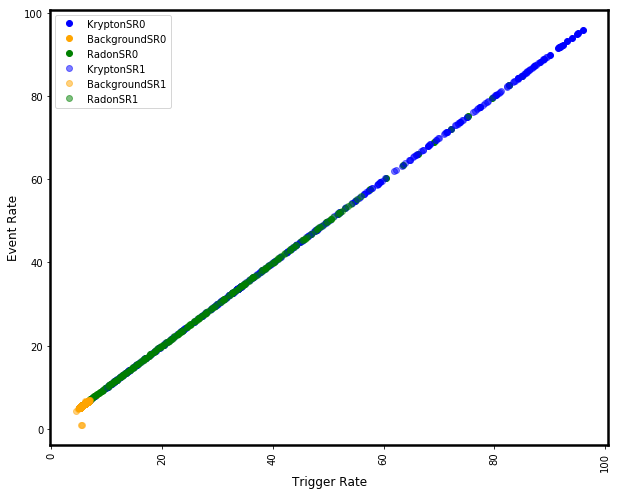

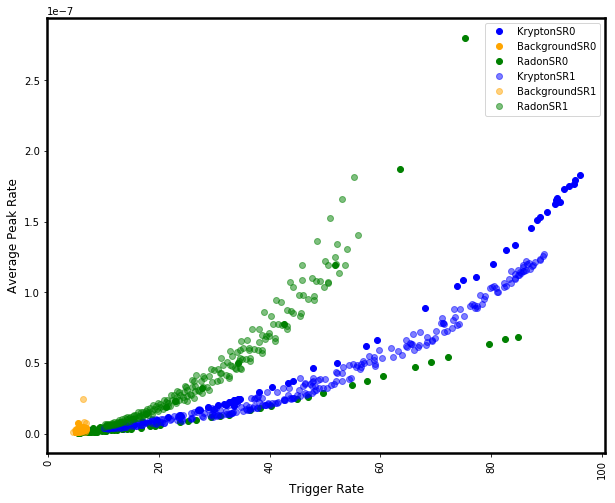

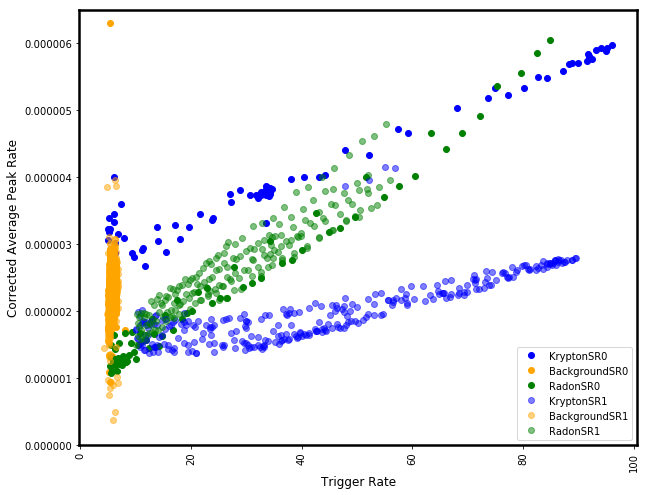

In [51]:

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['start'], df['average'], marker='o', linewidth=0, color=colours[index], label=key+'SR0')
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['start'], df['average'], marker='o', linewidth=0, color=colours[index], label=key+'SR1', alpha =0.5)
    index+=1
plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 3), datetime.date(2017, 2, 6)])
#plt.ylim([0, 0.01])
plt.legend(loc='best')
plt.ylabel('Average Peak Rate', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['trigger_rate'], df['event_rate'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR0')
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['trigger_rate'], df['event_rate'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR1', alpha =0.5)
    index+=1
plt.xlabel('Trigger Rate', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 3), datetime.date(2017, 2, 6)])
#plt.ylim([0, 5000])
plt.legend(loc='best')
plt.ylabel('Event Rate', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['trigger_rate'], df['average'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR0')
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['trigger_rate'], df['average'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR1', alpha =0.5)
    index+=1
plt.xlabel('Trigger Rate', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 3), datetime.date(2017, 2, 6)])
#plt.ylim([0, 50000])
plt.legend(loc='best')
plt.ylabel('Average Peak Rate', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['trigger_rate'], df['average']/df['livetime'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR0')
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['trigger_rate'], df['average']/df['livetime'], marker='o', 
             linewidth=0, color=colours[index], label=key+'SR1', alpha =0.5)
    index+=1
plt.xlabel('Trigger Rate', fontsize=12)
#plt.xlim([0, 10])
plt.ylim([0, 6.5*10**-6])
plt.legend(loc='best')
plt.ylabel('Corrected Average Peak Rate', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


###  Livetime - all events

In [ ]:
#Plots Live Time Fraction#

plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Blues")
"""
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
"""   
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)


plt.xlim([0, _xmax])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_livet_example.png", bboxes='tight')
#plt.savefig("fig_livet_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Uncorrected Peak Rate

In [ ]:
#Plots uncorrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0
plt.set_cmap("Blues")
"""
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
"""    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([0, window_length])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Uncorrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
plt.savefig("fig_deltat_example.png", bboxes='tight')
plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

In [ ]:
dict_source_sr0

### Live Time Corrected Peak Rate

In [ ]:
#Plots corrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0
"""    
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
"""  
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([1.5, 6.5])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
plt.savefig("fig_peak_rate_100ms.png", bboxes='tight')
plt.savefig("fig_peak_rate_100ms.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Questions:
    
 1.) Why Kr_SR0 higher than Kr_SR1? Probably event rate related. Look at individual calibrations. Should decrease with Kr source strength. If so, need some kind of cut to remove peaks from other events.
 
 2.)Why is Rn_SR0 higher than Rn_SR1. Source has not changed in activity signficantly. Injection procedure might have changed however. Could be lower overall event rate in SR1 if Kr explanation from (1) holds. Simple to check event rate.
 
 3.) Might be different "decay" tmes in SR0 and SR1 background. Could be bacground related? More alpha backgrounds in SR0 possibly. Check individual energy lines to be sure
 
Update:

After applying AFT cut:

 1.) . Kr still processing

 2.) Radon SR0 is now lower than Radon SR1, and more pronounced decay. Lower overall rate due to lower e-lifetime. Checks out.
 
 3.) Background more or less equivalent still, though higher rate at small times, posisbly due to higher extraction field and thsu charge yield.

### Split By Date of Krypton Dataset

  * If peak rate is related to event rate, should see decreasing peak rate trend in Krypton data

In [ ]:
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']

In [ ]:
%%time

kr_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 2, 10), datetime.date(2017, 2, 17), 
              datetime.date(2017, 2, 24), datetime.date(2017, 3, 3), datetime.date(2017, 3, 10), 
              datetime.date(2017, 3, 20), datetime.date(2017, 4, 7), datetime.date(2017, 4, 20)]

date_label=["5 Feb", "12 Feb", "21 Feb", "26 Feb", "5 Mar", "9 Mar",  "2 April", "16 April"]
print('Load Data')
simpath= '/project/lgrandi/jpienaar/cache_files/'
#simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_kr_calibrations={}
for t_index, date in enumerate(kr_cal_dates[:-1]):
    df=datasets_kr
    df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_kr_calibrations[date_label[t_index]]=dict_calibration

In [ ]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Krypton':
        for t_index, date in enumerate(kr_cal_dates[:-1]):
            print(kr_cal_dates[t_index], kr_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [ ]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_kr_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([2, 3.75])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

1.) Peak rate related to event rate seems to be true in Kr data, though 6th injection (Cal 5), is an outlier. Problematic. Decrease trend aslo not consistent with Rb83 half life

### Split by Date of Rn Datasets

In [ ]:
%%time

rn_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), 
              datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1)]

print('Load Data')
#simpath= '/project/lgrandi/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

date_label=["13 Mar", "9 May", "12 Jun", "10 Jul", "7 Aug"]

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_rn_calibrations={}
for t_index, date in enumerate(rn_cal_dates[:-1]):
    df=datasets_rn
    df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_rn_calibrations[date_label[t_index]]=dict_calibration

In [ ]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Radon':
        for t_index, date in enumerate(rn_cal_dates[:-1]):
            print(rn_cal_dates[t_index], rn_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
            print(df_temp.iloc[0].start)
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [ ]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_rn_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([3.2, 7.5])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Rn data also shows decreasing trend in peak rate. But why though? This would not be expected, as Th228 does not decay over months timescale, and increasing e-lifetime should lead to higher not lower single electron rate.

Look at Bkg data. De-couples "opening the valve" effect.

### Split Bkg data by Date

In [ ]:
%%time

bkg_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 3, 1), datetime.date(2017, 4, 1), 
              datetime.date(2017, 5, 1), datetime.date(2017, 6, 1), datetime.date(2017, 7, 1)]

print('Load Data')
simpath= '/project/lgrandi/jpienaar/cache_files/'
#simpath= '/scratch/midway2/jpienaar/cache_files/'

date_label=['Feb', 'Mar', 'Apr', 'May', 'Jun']

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_bkg_calibrations={}
for t_index, date in enumerate(bkg_cal_dates[:-1]):
    df=datasets_bkg
    df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_bkg_calibrations[date_label[t_index]]=dict_calibration

In [ ]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Background':
        for t_index, date in enumerate(bkg_cal_dates[:-1]):
            print(bkg_cal_dates[t_index], bkg_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 1), datetime.date(2017, 3, 1)])
plt.ylim([0, 0.005])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [ ]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_bkg_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([1.0, 6])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

From background seems different "rates" between different radon and krypton calibrations much more likely to be correlated to different "valve" conditions than enything else

### Two-D plots. No Cuts

Todo: Normalize next 3 cells by number of S2s of given size 
 * Not needed, livetime should take care of that already 

In [ ]:
##Live Time Corrected 2d Plots##
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
plt.set_cmap("Oranges")

_s2bins=50
_tbins=200
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))
    plt.figure(figsize=(10, 8))
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            livet_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            livet_hist=data['livet_hist']
            events=data['events']
    
   
    s2_norm_hist=events_hist.sum('delta_T')
    
    blank_hist=events_hist.similar_blank_histogram()
        
    for idt in range(_tbins):
        for ids2 in range (_s2bins):
            #blank_hist[idt][ids2]=
            bin_content=events_hist[idt][ids2]/livet_hist[idt][ids2]
            if np.isnan(bin_content):
                blank_hist[idt][ids2]=0
            else:
                blank_hist[idt][ids2]=bin_content
    
    blank_hist=blank_hist*10**6 #ms adjustment
    blank_hist.plot(cblabel = 'Corrected Event Rate [ms$^{-1}$.S2$^{-1}$]', vmax=1*10**1, vmin =0)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate_corrected.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate_corrected.pdf" %source, bboxes='tight')
    plt.show()    

    
   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Live Time Fraction [bin$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-6, vmax=10**-2)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_livetime.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_livetime.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
peaks_hist=0
events=0
for source, dict_data in dict_source_sr1.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del peaks_hist
    events=0
    for key, data in dict_data.items():
        try:
            peaks_hist
            peaks_hist+=data['peaks']
            events+=data['events']
        except NameError:
            peaks_hist=data['peaks']
            events=data['events']
    
    new_hist=peaks_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$]' ,norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('Peak Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_peaks.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_peaks.pdf" %source, bboxes='tight')
    plt.show()    

   


### Looking at energy lines

In [ ]:
#Plots corrected event with error added#

colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
#[5.3, 6]
#[3, 3.7]
#[4.5, 5.2]
#[2, 2.7]

lower_cs2=2
upper_cs2=3

plt.figure(figsize=(10, 8))

index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([0, 10])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Radon SR1 seems consistely off. Only first calibration injection is very high. Does exluding this move Radon SR1 closer to other datasets?

### Excluding First SR1 Radon Injection

In [ ]:
%%time

rn_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), 
              datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1)]

print('Load Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

df=datasets_rn
df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[1], 'TimeCut Low')
dataset_names=df_temp['name']
dict_calibration={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names.isin([dataset[:-7]]).any():
         with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            dict_calibration[key]=data_dict


In [ ]:
dict_source_sr1={'Radon' : dicts_datasets_rn, 'Krypton': dicts_datasets_kr, 
                 'Background' : dicts_datasets_bkg, 'Reduced Radon': dict_calibration}
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))

In [ ]:
#Plots corrected event with error added#

colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
#[5.3, 6]
#[3, 3.7]
#[4.5, 5.2]
#[2, 2.7]

lower_cs2=3
upper_cs2=3.7

plt.figure(figsize=(10, 8))

index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    weight_hist=weight_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_hist=livet_hist.slicesum(lower_cs2, upper_cs2, 's2_area')
    livet_weight=livet_weight.slicesum(lower_cs2, upper_cs2, 's2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([0, 10])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Position Correlation Stuff

In [ ]:
## Load random Sampled (Generated at end of notebook if needed)
with open('random_source_sampling.pkl', 'rb') as handle:
    dfs_source_distrib_hist = pickle.load(handle)

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=8*10**-4
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
for source, dict_data in dict_source_sr1.items():
    plt.figure(figsize=(10, 4))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_r2']
            weight_hist+=data['dt_r2_weights'] 
            events+=data['events']
        except NameError:
            r2_hist = data['dt_r2']
            weight_hist=data['dt_r2_weights'] 
            events=data['events']
    
    events_hist=r2_hist.sum('delta_T')
    weight_hist=weight_hist.sum('delta_T')

    #Confidence Bands
    x = _rpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_rpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    
    del r2_hist
    del weight_hist
    del events
    dict_data=dict_source_sr0[source]
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_r2']
            weight_hist+=data['dt_r2_weights'] 
            events+=data['events']
        except NameError:
            r2_hist = data['dt_r2']
            weight_hist=data['dt_r2_weights'] 
            events=data['events']
    
    events_hist=r2_hist.sum('delta_T')
    weight_hist=weight_hist.sum('delta_T')

    #Confidence Bands
    x = _rpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_rpoints[1:], events_hist/events, linewidth=3,  color=colours[index+1], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index+1], interpolate=True, alpha = 0.25)


    random_comp = dfs_source_distrib_hist[source]['alpha']
    r_norms = dfs_source_distrib_hist[source]['r_norms']

    content, bins = np.histogram(random_comp[:, 0]**2, weights=1/r_norms, bins=100, range=[0, (R_tpc)**2])
    scaling_factor=np.sum(events_hist[:]/events)/np.sum(content)
    plt.hist(random_comp[:, 0]**2, weights=scaling_factor/r_norms, range=[0, (R_tpc)**2], bins=100, 
             histtype='stepfilled', linewidth=2, label='%s Sim' %source, color='green', alpha=0.5)
    #print(np.nansum(random_comp[:,0]**2/r_norms))
    
    
    #event_max=np.max(new_hist)
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")
   
    idx=1
    for bin_value in new_hist[1:]:
        if bin_value<(content[idx]*scaling_factor):
            plt.vlines(_rpoints[idx], 0, _ymax, color='red', 
                       linestyle="dashed", label='%.2f cm' %float(np.sqrt(_rpoints[idx])))
            break
        idx+=1
    
    plt.xlim([0, _xmax])
    plt.ylim([_ymin, _ymax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.100ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
#t_bins=[0, 5*10**8, 2*10**9]
livet_tbin_width=0.5*10**6
t_bins=np.linspace(0, 1*10**8, 7)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source_sr0.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            weights_hist+=data['dt_r2_weights'] 
            livet_hist+=data['livet_hist']  
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            weights_hist=data['dt_r2_weights'] 
            livet_hist = data['livet_hist']  
            events = data['events']           
            
            
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):      
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')
        new_weight_hist=weights_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = int(np.floor(start_time/(livet_tbin_width)))
        stop_bin  = int(np.floor(stop_time/(livet_tbin_width)))
        livet_array=np.array
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        

        #Confidence Bands
        x = _rpoints
        x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
        y1=new_hist-np.sqrt(new_weight_hist)
        y2=new_hist+np.sqrt(new_weight_hist)
        y_single = np.repeat(y1[:], 2)
        y_total = np.repeat(y2[:], 2)

        #Plot
        plt.step(_rpoints[1:], new_hist/livet_correction, linewidth=2,  color=colours[index],
                 label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
        plt.fill_between(x, y_single/livet_correction, 
                         y_total/livet_correction, facecolor=colours[index], interpolate=True, alpha = 0.25)
        

    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([1*10**-1, 3*10])
    plt.yscale('log')
    #plt.savefig("fig_%s_r_dep_timeslices.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dep_timeslices.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
t_bins=np.linspace(0, 1*10**8, 5)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source_sr0.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            livet_hist+=data['livet_hist']
            weights_hist+=data['dt_r2_weights'] 
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            livet_hist = data['livet_hist']
            weights_hist=data['dt_r2_weights'] 
            events = data['events']
 
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):
        #Time Slice Hist
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')
        new_weight_hist=weights_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = int(np.floor(start_time/(livet_tbin_width)))
        stop_bin  = int(np.floor(stop_time/(livet_tbin_width)))
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        
        
        new_hist=new_hist/livet_correction
        new_weight_hist=new_weight_hist/livet_correction
        
        #Reference time window hist
        ref_start_time=t_bins[-2]
        ref_stop_time=t_bins[-1]
        #print(ref_start_time, ref_stop_time)
        ref_hist=dt_r2_hist.slicesum(start=ref_start_time, stop=ref_stop_time,axis='delta_T')
        ref_weight=weights_hist.slicesum(start=ref_start_time, stop=ref_stop_time,axis='delta_T')
        
        #Livetime in reference slice
        ref_start_bin = int(np.floor(ref_start_time/(livet_tbin_width)))
        ref_stop_bin  = int(np.floor(ref_stop_time/(livet_tbin_width)))
        ref_livet_correction = np.average(livet_hist[ref_start_bin:ref_stop_bin])
        #print(ref_start_bin, ref_stop_bin, ref_livet_correction)  
        
        ref_hist=ref_hist/ref_livet_correction
        ref_weight=ref_weight/ref_livet_correction

        #Error
        num_value=np.array(new_hist)
        denum_value=np.array(ref_hist)
        num_error = np.sqrt(new_weight_hist)
        denum_error = np.sqrt(ref_weight)
        e1 = num_error
        e2 = denum_error
        b1 = num_value
        b2 = denum_value
        w=b1/b2

        ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
        ratio = num_value/denum_value 

        #Confidence Bands
        x = _rpoints
        x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
        y1=ratio-np.sqrt(ratio_error)
        y2=ratio+np.sqrt(ratio_error)
        y_lower = np.repeat(y1[:], 2)
        y_upper = np.repeat(y2[:], 2)

        #Plot
        plt.step(_rpoints[1:], ratio-1, linewidth=3,  color=colours[index], 
                 label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
        plt.fill_between(x, y_lower-1, y_upper-1, facecolor=colours[index], interpolate=True, alpha = 0.25)
        index+=1

        #Difference Hist
        #diff_hist=(new_hist-ref_hist)/ref_hist
        #diff_hist.plot(label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
             
        #const_std=np.std(diff_hist[25:75])
        #const_ave=np.average(diff_hist[25:75])
        plt.hlines(0, 0, _xmax, color='r', linestyle=":")
        #plt.fill_between(r_bins, [const_ave-const_std]*len(r_bins), [const_ave+const_std]*len(r_bins),alpha=0.25,facecolor=colours[index])
        #print(const_std, )
        
        
        #new_hist.plot(label=index)
    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Relative Difference', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([-0.35, 1])
    #plt.yscale('log')
    #plt.savefig("fig_%s_r_diff_timeslices.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_diff_timeslices.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=8*10**-4
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
for source, dict_data in dict_source_sr1.items():
    plt.figure(figsize=(10, 8))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_xy']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_xy']
            events=data['events']
    
    events_hist=r2_hist.sum('delta_T')/events
    events_hist.plot(norm=LogNorm(), vmin=1*10**-4)
    
 
    
    #plt.xlim([0, _xmax])
    #plt.ylim([_ymin, _ymax])
    plt.xlabel('Delta X [cm]', fontsize=12)
    plt.ylabel('Delta Y [cm]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    #plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=8*10**-4
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
plt.set_cmap("RdBu")
for source, dict_data in dict_source_sr1.items():
    plt.figure(figsize=(10, 8))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_xy']
            livet_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_xy']
            livet_hist=data['livet_hist']
            events=data['events']
            
    livet_hist=livet_hist.sum('s2_area')
    
    ref_hist=r2_hist.slicesum(75*10**6, 100*10**6, 'delta_T')
    ref_livet=np.average(livet_hist[150:200])
    ref_hist=ref_hist/ref_livet
    
    events_hist=r2_hist.slicesum(5*10**6, 25*10**6, 'delta_T')
    events_livet=np.average(livet_hist[10:50])
    events_hist=events_hist/events_livet
    
    plot_hist=(events_hist-ref_hist)/ref_hist
    plot_hist.plot(vmax=1, vmin=-1)
    
 
    
    #plt.xlim([0, _xmax])
    #plt.ylim([_ymin, _ymax])
    plt.xlabel('Delta X [cm]', fontsize=12)
    plt.ylabel('Delta Y [cm]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    #plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


### X/Y Slixes

In [ ]:
_spatial_bins=50
_xbins=np.linspace(-50, 50, _spatial_bins+1)
_ybins=np.linspace(-50, 50, _spatial_bins+1)
xv, yv = np.meshgrid(_xbins, _ybins)
array_hist = np.zeros((_spatial_bins, _spatial_bins))
xc = np.zeros_like(array_hist)
yc = np.zeros_like(array_hist)

r_lower=15
r_upper=20
key_search=[]

for idx, x_edge in tqdm(enumerate(xv[:-1])):
    for idy, y_edge in enumerate(yv[:-1]):
        xc[idx, idy]=xv[idx][idy]+(xv[idx][idy+1]-xv[idx][idy])/2
        yc[idx, idy]=yv[idx][idy]+(yv[idx+1][idy]-yv[idx][idy])/2
        
        rc = np.sqrt(xc[idx, idy]**2+yc[idx, idy]**2)
        
        if rc>r_lower and rc<r_upper:
            key_search.append('%d_%d' %(xc[idx, idy], yc[idx, idy]))

In [ ]:
%%time
print('Data')
#simpath= '/scratch/midway2/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*special.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn_xy={}
dicts_datasets_kr_xy={}
dicts_datasets_bkg_xy={}
for dataset in tqdm(datasets[:]):
    #print(key)
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-15]]).any():
        #print('Radon')
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
    dicts_datasets_rn_xy[dataset]=data_dict


In [ ]:
temp_dict={'Radon': dicts_datasets_rn_xy}

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
r2_hist=0
for source, dict_data in temp_dict.items():
    plt.figure(figsize=(10, 8))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_xy']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_xy']
            events=data['events']
    
    events_hist=r2_hist.sum('delta_T')
    events_hist.plot(vmin=1)
    
 
    
    #plt.xlim([-10, 60])
    #plt.ylim([_ymin, _ymax])
    plt.xlabel('Delta X [cm]', fontsize=12)
    plt.ylabel('Delta Y [cm]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    #plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=8*10**-4
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
plt.set_cmap("RdBu")
for source, dict_data in temp_dict.items():
    plt.figure(figsize=(10, 8))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_xy']
            livet_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_xy']
            livet_hist=data['livet_hist']
            events=data['events']
            
    livet_hist=livet_hist.sum('s2_area')
    
    ref_hist=r2_hist.slicesum(75*10**6, 100*10**6, 'delta_T')
    ref_livet=np.average(livet_hist[150:200])
    ref_hist=ref_hist/ref_livet
    
    events_hist=r2_hist.slicesum(5*10**6, 25*10**6, 'delta_T')
    events_livet=np.average(livet_hist[10:50])
    events_hist=events_hist/events_livet
    
    plot_hist=(events_hist-ref_hist)/ref_hist
    plot_hist.plot(vmax=1, vmin=-1)
    
 
    
    #plt.xlim([0, _xmax])
    #plt.ylim([_ymin, _ymax])
    plt.xlabel('Delta X [cm]', fontsize=12)
    plt.ylabel('Delta Y [cm]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    #plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()

In [ ]:
dict_source_xy={'Radon' : dicts_datasets_rn_xy, 'Krypton': dicts_datasets_kr_xy, 'Background' : dicts_datasets_bkg_xy}

In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
t_bins=np.linspace(0, 2*10**8, 5)
for source, dict_data in dict_source_xy.items():
    numrows=1
    numcols=len(t_bins)-2
    plt.figure(figsize=(10*numcols, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    for index, delta_t in enumerate(t_bins[::2]):
        plt.subplot2grid((numrows,numcols), (0, index))
        ax = plt.gca()
        circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        
        slice_hist=new_hist.slicesum(start=t_bins[index], stop=t_bins[index+1],axis='delta_T')
        slice_hist.plot(norm=LogNorm(), cblabel='Normalized Entries', vmin=5*10**-11, vmax=5*10**-9)
        plt.xlabel('X  [cm]', fontsize=12)
        plt.ylabel('Y  [cm]', fontsize=12)


    plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


In [ ]:
numcols
np.floor(len(t_bins)/2)

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
for source, dict_data in dict_source_xy.items():
    plt.figure(figsize=(10, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    ax = plt.gca()
    circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    
    new_hist=new_hist.slicesum(start=1*10**8, stop=2*10**8,axis='delta_T')
    print(np.average(new_hist))
    new_hist.plot(label=source, norm=LogNorm())
    index+=1

#plt.xlim([0, _xmax])
#plt.ylim([_ymin, _ymax])
    plt.xlabel('X  [cm]', fontsize=12)
    plt.ylabel('Y  [cm]', fontsize=12)
#plt.legend(loc='best', fontsize=12)
#plt.yscale('log')
    #plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    #plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


### Testing R normalization

In [ ]:
#Uniform Distrib
coords=np.random.random([100000, 2])
new_array=[]
closed_array=[]
open_array=[]
alpha_array=[]
r_norms=[]
s2_ypos=20
s2_xpos=-23
rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
for pos in coords:
    xpos=R_tpc*(2*pos[0]-1)
    ypos=R_tpc*(2*pos[1]-1)
    if (ypos**2+xpos**2)>R_tpc**2:
        continue
    else:
        xpos=R_tpc*(2*pos[0]-1)
        ypos=R_tpc*(2*pos[1]-1)
        new_array.append([xpos, ypos])
        
        r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
        alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
        r_norm = (alpha/np.pi)
        if np.isnan(alpha):
            alpha=-1
            r_norm=1
            closed_array.append([xpos, ypos])
        elif alpha>0.5*np.pi:
            open_array.append([xpos, ypos])
        new_array.append([xpos, ypos])
        alpha_array.append([r_dist, alpha])
        r_norms.append(r_norm)
        
      

In [ ]:
plt.figure(figsize=(8, 8))
new_array=np.array(new_array)
closed_array=np.array(closed_array)
open_array=np.array(open_array)
plt.scatter(new_array[:, 0], new_array[:, 1])
plt.scatter(closed_array[:, 0], closed_array[:, 1])
plt.scatter(open_array[:, 0], open_array[:, 1])
plt.scatter(s2_xpos, s2_ypos, color='r', s=20)
plt.xlabel('X  [cm]', fontsize=12)
plt.ylabel('Y  [cm]', fontsize=12)
#plt.savefig('fig_r_norm_illustration.png')

### Load Data and Produce Random Sample

In [ ]:
%%time
#Load Data To Sample From

print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*Pre_trigger.hdf5', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

datasets_rn=[]
datasets_kr=[]
datasets_bkg=[]
for dataset in tqdm(datasets[:]):
    run_number=dataset[:-17]
    if dataset_names_rn.isin([run_number]).any():
        while len(datasets_rn)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_rn.append(df)
            
    elif dataset_names_bkg.isin([run_number]).any():
        while len(datasets_bkg)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_bkg.append(df)
            
    elif dataset_names_kr.isin([run_number]).any():
        while len(datasets_kr)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_kr.append(df)
              
    
datasets_rn=pd.concat(datasets_rn)
datasets_kr=pd.concat(datasets_kr)
datasets_bkg=pd.concat(datasets_bkg)

In [ ]:
dfs_source_distrib={'Background': {'data':datasets_bkg},
                    'Radon': {'data': datasets_rn},
                    'Krypton': {'data': datasets_kr}}

In [ ]:
#Distrib from Data
dfs_source_distrib_hist={}
sample_num=1000
for key, source in dfs_source_distrib.items():
    print(key)
    df=source['data']
    alpha_array=[]
    new_array=[]
    r_norms=[]
    unique_y=pd.unique(df['y_s2_tpf'].values)
    unique_x=pd.unique(df['x_s2_tpf'].values)
    unique_events=[[x, y] for x, y in zip(unique_x, unique_y)]
    sampled_df=df.filter(['x_p_tpf','y_p_tpf'])
    sampled_df=sampled_df.sample(sample_num)
    for unique_s2 in tqdm(unique_events[:sample_num]):
        s2_ypos=unique_s2[1]
        s2_xpos=unique_s2[0]
        rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
        for peak_key, peak in sampled_df.iterrows():
            xpos=peak['x_p_tpf']
            ypos=peak['y_p_tpf']
            new_array.append([xpos, ypos])

            r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
            alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
            r_norm = (alpha/np.pi)
            if np.isnan(alpha):
                alpha=-1
                r_norm=1
            alpha_array.append([r_dist, alpha])
            r_norms.append(r_norm)

    alpha_array=np.array(alpha_array)
    r_norms=np.array(r_norms)
    dfs_source_distrib_hist[key]={'alpha': alpha_array, 'r_norms': r_norms}

In [ ]:
plt.figure(figsize=(10, 8))
for key, source in dfs_source_distrib_hist.items():
    alpha_array=source['alpha']
    r_norms=source['r_norms']
    print(key,len(alpha_array), len(r_norms))
    plt.hist(alpha_array[:, 0]**2, weights=1/r_norms, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2, label=key)
    #plt.vlines((R_tpc-rpos)**2, 0, 5000)
    #plt.vlines((R_tpc+rpos)**2, 0, 5000)
#plt.yscale('log')
plt.xlim([0, (2*R_tpc)**2])
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
plt.legend(loc='best')
#plt.savefig('fig_r2_norm_illustration_weighted.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(alpha_array[:, 0]**2, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2)
#plt.vlines((R_tpc-rpos)**2, 0, 5000)
#plt.vlines((R_tpc+rpos)**2, 0, 5000)
#plt.ylim([0, 5000])
plt.yscale('log')
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
#plt.savefig('fig_r2_norm_illustration.png')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(alpha_array[:, 0], r_norms)

In [ ]:
with open('random_source_sampling.pkl', 'wb') as handle:
    pickle.dump(dfs_source_distrib_hist, handle, protocol=pickle.HIGHEST_PROTOCOL)